# 🌀 Exercício 1 — Problema das Espirais

Considere o problema das espirais. Sendo a espiral 1 uma classe e a espiral 2 outra classe, gere os dados usando as seguintes equações:

* Para espiral 1:

$$
x = \frac{\theta}{4} \cos(\theta), \quad y = \frac{\theta}{4} \sin(\theta), \quad \theta \geq 0
$$

* Para espiral 2:

$$
x = \left(\frac{\theta}{4} + 0.8\right) \cos(\theta), \quad y = \left(\frac{\theta}{4} + 0.8\right) \sin(\theta), \quad \theta \geq 0
$$

Considere $\theta$ assumindo **1000 valores igualmente espaçados** entre 0 e 20 radianos.

---

## 🔍 Objetivo:

Solucione este problema de classificação considerando:

**a)** Uma **Máquina de Vetor de Suporte (SVM)**

**b)** Um **comitê de máquinas**, formado por:

* Uma **rede Perceptron de uma camada oculta**
* Uma **RBF**
* Uma **SVM**


## a) Uma Máquina de Vetor de Suporte (SVM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax


In [2]:
# Definir o intervalo de theta
theta = np.linspace(0, 20, 1000)

# Espiral 1
x1 = (theta / 4) * np.cos(theta)
y1 = (theta / 4) * np.sin(theta)
labels1 = np.zeros_like(theta)

# Espiral 2
x2 = ((theta / 4) + 0.8) * np.cos(theta)
y2 = ((theta / 4) + 0.8) * np.sin(theta)
labels2 = np.ones_like(theta)




In [3]:
# Concatenar os dados
X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.concatenate((labels1, labels2))

# Criar um DataFrame
spiral_data = pd.DataFrame(X, columns=["x", "y"])
spiral_data["label"] = y

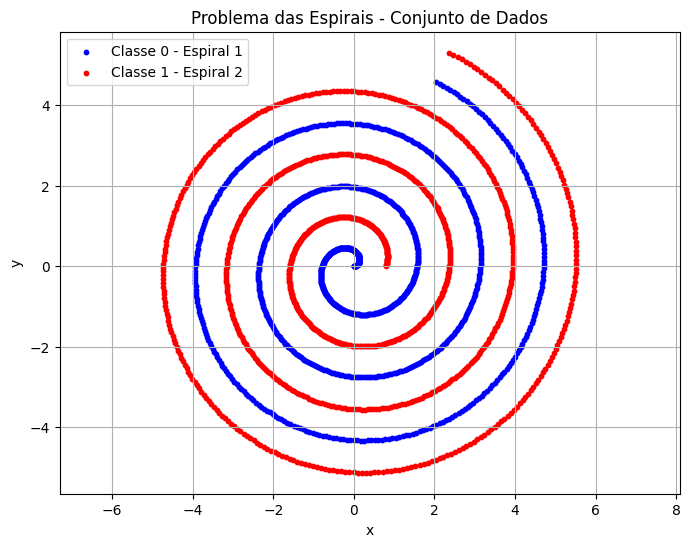

In [4]:
# Plotar as espirais
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, c='blue', label='Classe 0 - Espiral 1', s=10)
plt.scatter(x2, y2, c='red', label='Classe 1 - Espiral 2', s=10)
plt.title("Problema das Espirais - Conjunto de Dados")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

In [5]:
# Separar features e rótulos
X_data = spiral_data[["x", "y"]].values
y_data = spiral_data["label"].values

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)

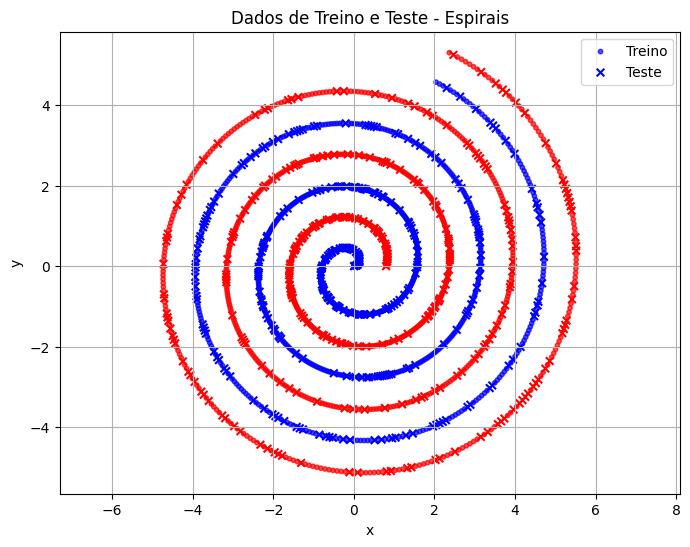

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', label='Treino', s=10, alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', marker='x', label='Teste', s=30)
plt.title("Dados de Treino e Teste - Espirais")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Treino", "Teste"])
plt.grid(True)
plt.axis("equal")
plt.show()

In [7]:
# Criar e treinar o modelo SVM com kernel RBF
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=300, gamma='auto', probability=True, random_state=42)
, memory=None)

In [8]:
svm_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=300, gamma='auto', probability=True, random_state=42))])

In [9]:
# Previsão e avaliação
y_pred_svm_rbf = svm_model.predict(X_test)
report_svm_rbf = classification_report(y_test, y_pred_svm_rbf, output_dict=True)

In [10]:
# Exibir relatório
pd_svm_rbf = pd.DataFrame(report_svm_rbf).transpose()
pd_svm_rbf = pd_svm_rbf.round(2)
print("Relatório de Classificação - SVM com Kernel RBF")
pd_svm_rbf

Relatório de Classificação - SVM com Kernel RBF


,precision,recall,f1-score,support
0.0,0.90,0.64,0.75,300.00
1.0,0.72,0.93,0.81,300.00
accuracy,0.78,0.78,0.78,0.78
macro avg,0.81,0.78,0.78,600.00
weighted avg,0.81,0.78,0.78,600.00


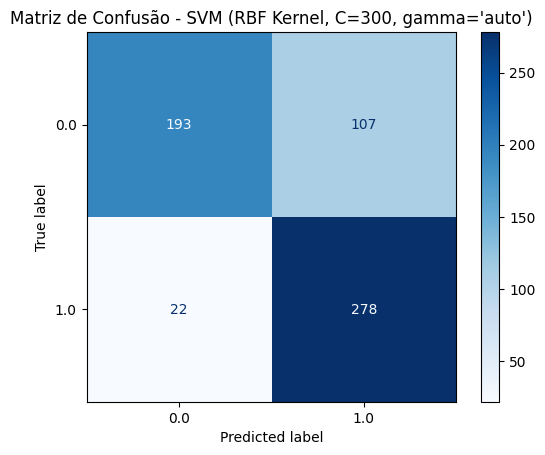

In [11]:
# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_rbf, cmap='Blues')
plt.title("Matriz de Confusão - SVM (RBF Kernel, C=300, gamma='auto')")
plt.show()

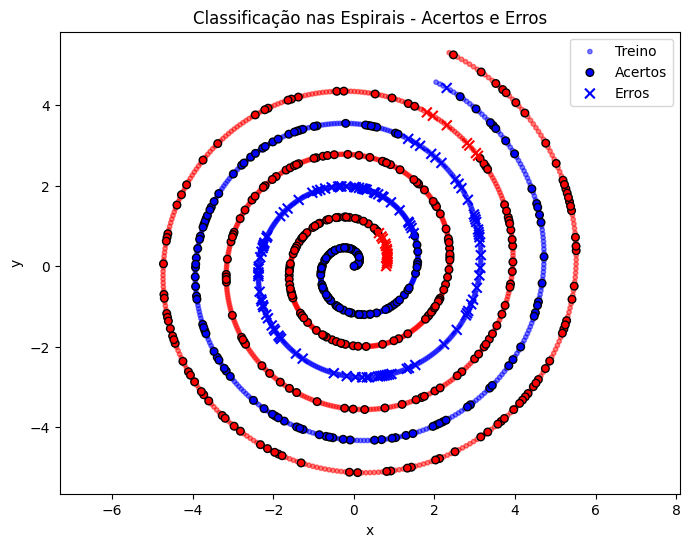

In [42]:
# Separar pontos corretamente e incorretamente classificados
correct_idx = np.where(y_test == y_pred_svm_rbf)[0]
incorrect_idx = np.where(y_test != y_pred_svm_rbf)[0]

# Plot
plt.figure(figsize=(8, 6))

# Treino (sem alterações)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10, alpha=0.5, label='Treino')

# Teste - Acertos
plt.scatter(X_test[correct_idx, 0], X_test[correct_idx, 1], 
            c=y_test[correct_idx], cmap='bwr', marker='o', s=30, edgecolors='k', label='Acertos')

# Teste - Erros
plt.scatter(X_test[incorrect_idx, 0], X_test[incorrect_idx, 1], 
            c=y_test[incorrect_idx], cmap='bwr', marker='x', s=50, linewidths=1.5, label='Erros')

plt.title("Classificação nas Espirais - Acertos e Erros")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(False)
plt.axis("equal")
plt.legend()
plt.show()

###  **Comitê de máquinas**, formado por MPL + RBF + SVM

In [15]:
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=300, gamma='auto', probability=True, random_state=42)
, memory=None)

In [16]:
# Criar a MLP com uma camada oculta de 10 neurônios
mlp_model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
, memory=None)

In [29]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
import numpy as np

class RBFNetwork(BaseEstimator, ClassifierMixin):
    def __init__(self, n_centers=10, gamma=1.0, random_state=42):
        self.n_centers = n_centers
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y):
        self.classes_ = np.unique(y)  # Agora 100% compatível
        self.encoder_ = OneHotEncoder(sparse_output=False)
        Y_onehot = self.encoder_.fit_transform(y.reshape(-1, 1))

        kmeans = KMeans(n_clusters=self.n_centers, random_state=self.random_state)
        self.centers_ = kmeans.fit(X).cluster_centers_

        Phi = self._rbf_activation(X)
        self.output_weights_ = np.linalg.pinv(Phi) @ Y_onehot

        return self

    def _rbf_activation(self, X):
        return np.exp(-self.gamma * np.linalg.norm(X[:, np.newaxis, :] - self.centers_, axis=2) ** 2)

    def predict_proba(self, X):
        Phi = self._rbf_activation(X)
        output = Phi @ self.output_weights_
        return softmax(output, axis=1)

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]


In [30]:
rbf_model = RBFNetwork(n_centers=10, gamma=1.5)

In [31]:
# 1. Treine separadamente cada modelo
mlp_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)  # sem pipeline

RBFNetwork(gamma=1.5)

In [32]:
# 2. Pegue as probabilidades preditas para o conjunto de teste
proba_mlp = mlp_model.predict_proba(X_test)
proba_svm = svm_model.predict_proba(X_test)
proba_rbf = rbf_model.predict_proba(X_test)

In [33]:
# 3. Combine as probabilidades (votação soft - média simples)
avg_proba = (proba_mlp + proba_svm + proba_rbf) / 3

In [34]:
# 4. Pegue a classe com maior probabilidade média
y_pred_manual_committee = np.argmax(avg_proba, axis=1)

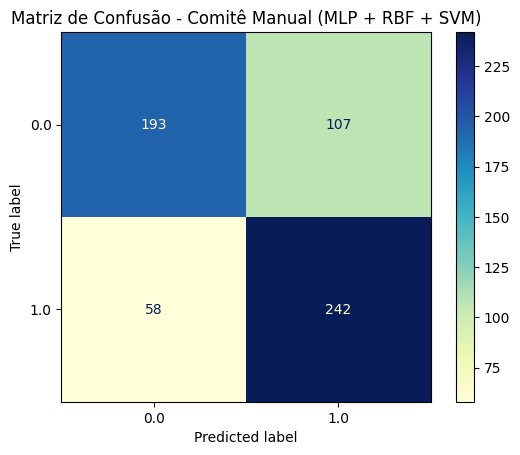

In [35]:
# 5. Avalie o desempenho
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_manual_committee, cmap="YlGnBu")
plt.title("Matriz de Confusão - Comitê Manual (MLP + RBF + SVM)")
plt.show()

In [37]:
report_manual_committee = classification_report(y_test, y_pred_manual_committee, output_dict=True)
pd_manual_committee = pd.DataFrame(report_manual_committee).transpose()
pd_manual_committee = pd_manual_committee.round(2)
print("Relatório de Classificação - Comitê Manual (MLP + RBF + SVM)")
pd_manual_committee

Relatório de Classificação - Comitê Manual (MLP + RBF + SVM)


,precision,recall,f1-score,support
0.0,0.77,0.64,0.70,300.00
1.0,0.69,0.81,0.75,300.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.73,0.72,0.72,600.00
weighted avg,0.73,0.72,0.72,600.00


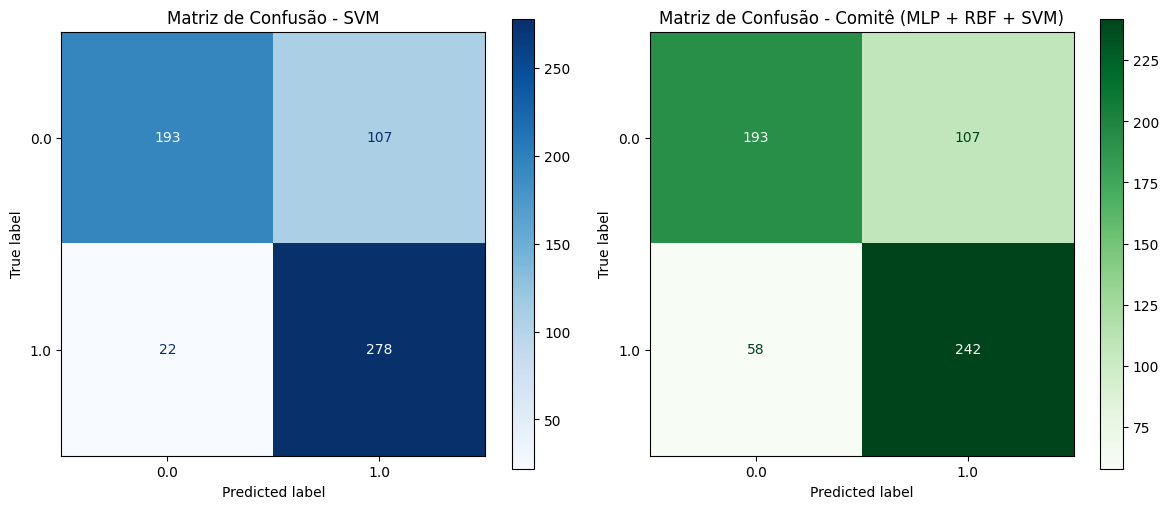

In [38]:
# Plotar matrizes de confusão
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_rbf, ax=axs[0], cmap="Blues")
axs[0].set_title("Matriz de Confusão - SVM")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_manual_committee, ax=axs[1], cmap="Greens")
axs[1].set_title("Matriz de Confusão - Comitê (MLP + RBF + SVM)")

plt.tight_layout()
plt.show()

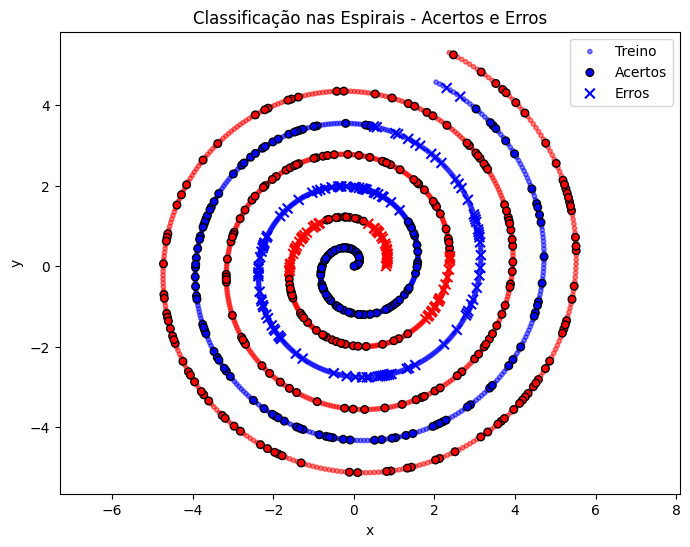

In [41]:
# Separar pontos corretamente e incorretamente classificados
correct_idx = np.where(y_test == y_pred_manual_committee)[0]
incorrect_idx = np.where(y_test != y_pred_manual_committee)[0]

# Plot
plt.figure(figsize=(8, 6))

# Treino (sem alterações)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10, alpha=0.5, label='Treino')

# Teste - Acertos
plt.scatter(X_test[correct_idx, 0], X_test[correct_idx, 1], 
            c=y_test[correct_idx], cmap='bwr', marker='o', s=30, edgecolors='k', label='Acertos')

# Teste - Erros
plt.scatter(X_test[incorrect_idx, 0], X_test[incorrect_idx, 1], 
            c=y_test[incorrect_idx], cmap='bwr', marker='x', s=50, linewidths=1.5, label='Erros')

plt.title("Classificação nas Espirais - Acertos e Erros")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(False)
plt.axis("equal")
plt.legend()
plt.show()